In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
from scipy.sparse import spdiags, eye
from scipy.sparse.linalg import spsolve

%matplotlib inline

#  Problems
We will look at the linear equation,

$$\frac{d^2 y}{dx^2} + y = 0,$$
subject to $y(0) = 1$, and $y(\pi/2) = 0$.

We will also look at the nonlinear equation, 

$$\frac{d^y}{dx^2} + y^3 = 0,$$
subject to $y(0) = 1$, and $y(\pi/2) = 00$.

## Linear Case

Finite difference approximation for the second derivative
$$\frac{d^2y}{dx^2} \approx \frac{y_{i-1} -2y_i + y_{i+1}}{\Delta^2}$$
where $\Delta$ is the grid spacing.

So our equation cn be transformed to a system of algebraic equations:
$$\frac{y_{i-1} -2y_i + y_{i+1}}{\Delta^2} + y_i = 0$$


For example,
$$
\begin{align*}
y_1 & = & 1 \\
\frac{y_1 -2y_2 + y_3}{\Delta^2} + y_2  &= & 0 \\
\frac{y_2 -2y_3 + y_4}{\Delta^2} + y_3  &= & 0 \\
\frac{y_3 -2y_4 + y_5}{\Delta^2} + y_4  &= & 0 \\
\frac{y_4 -2y_5 + y_6}{\Delta^2} + y_5  &= & 0 \\
y_6 & = & 0 
\end{align*}
$$

Or in matrix form,

$$
\frac{1}{\Delta^2}
\begin{pmatrix}
0 & 0 & 0 & 0 & 0 & 0 \\
1 & -2 & 1 & 0 & 0 & 0 \\
0 & 1 & -2 & 1 & 0 & 0 \\
0 & 0 & 1 & -2 & 1 & 0  \\
0 & 0 & 0 & 1 & -2 & 1  \\
0 & 0 & 0 & 0 & 0 & 0
\end{pmatrix} 
\begin{pmatrix}
y_1 \\
y_2 \\
y_3 \\
y_4 \\
y_5 \\
y_6
\end{pmatrix}+ 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
y_1 \\
y_2 \\
y_3 \\
y_4 \\
y_5 \\
y_6
\end{pmatrix}= 
\begin{pmatrix}
1 \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{pmatrix}
$$


Factoring out the column vector,
$$
\left[
\frac{1}{\Delta^2}
\begin{pmatrix}
0 & 0 & 0 & 0 & 0 & 0 \\
1 & -2 & 1 & 0 & 0 & 0 \\
0 & 1 & -2 & 1 & 0 & 0 \\
0 & 0 & 1 & -2 & 1 & 0  \\
0 & 0 & 0 & 1 & -2 & 1  \\
0 & 0 & 0 & 0 & 0 & 0
\end{pmatrix} 
+ 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix} \right]\quad
\begin{pmatrix}
y_1 \\
y_2 \\
y_3 \\
y_4 \\
y_5 \\
y_6
\end{pmatrix}= 
\begin{pmatrix}
1 \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{pmatrix}
$$

In [2]:
#  Set the number of grid points, define our x-values and working out the grid spacing
N = 10000
x = np.linspace(0, np.pi/2, N)
Delta = np.diff(x); Delta = Delta[0]

#  Define the values that will go into our derivative matrix
temp = [np.ones( x.size), -2 * np.ones(x.size), np.ones(x.size)]

#  Build the second derivative matrix
D2 = spdiags(temp, [-1, 0, 1], x.size, x.size, format = 'csc')

#  For the y-term in the ODE, we need only the identity matrix
E = eye(x.size, format = 'csc')

#  Build matrix equation
M = D2/Delta**2 + E
M[0,0] = 1; M[0,1] = 0; M[-1, -2] = 0; M[-1, -1] = 1

#   This is the vector of knowns.  It is the right-hand side of the equation above.
knowns = np.zeros(x.size); knowns[0] = 1

#  Solve the system
y = spsolve(M, knowns)

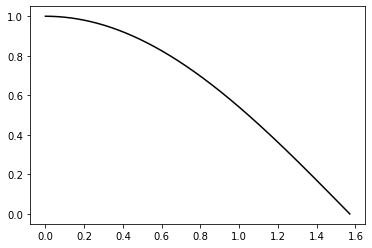

In [3]:
#  Plot the results
plt.plot(x, y, 'k')

##  Nonlinear Problem

In matrix form we have,
$$
\frac{1}{\Delta^2}
\begin{pmatrix}
0 & 0 & 0 & 0 & 0 & 0 \\
1 & -2 & 1 & 0 & 0 & 0 \\
0 & 1 & -2 & 1 & 0 & 0 \\
0 & 0 & 1 & -2 & 1 & 0  \\
0 & 0 & 0 & 1 & -2 & 1  \\
0 & 0 & 0 & 0 & 0 & 0
\end{pmatrix} 
\begin{pmatrix}
y_1 \\
y_2 \\
y_3 \\
y_4 \\
y_5 \\
y_6
\end{pmatrix}+ 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
y_1^3 \\
y_2^3 \\
y_3^3 \\
y_4^3 \\
y_5^3 \\
y_6^3
\end{pmatrix} -
\begin{pmatrix}
1 \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{pmatrix} = 0.
$$

Note how we can no longer solve the system with simple matrix inverses.

### fsolve
Scipy and MATLAB both have a function <i>fsolve</i> which solves problems of the form
$$f(x) = 0.$$

We can construct or equations using sparse matrices and use fsolve to get the solution.

In [4]:
class Nonlinear:
    
    def __init__(self):
        #  Numer of grid points, our x-values and the grid spacing
        self.N = 1000
        self.x = np.linspace(0, np.pi/2, self.N)
        self.Delta = np.diff(self.x); self.Delta = self.Delta[0]
        
        #  Terms needed for the second derivative matrix
        temp = [np.ones( self.x.size), -2 * np.ones(self.x.size), np.ones(self.x.size)]

        #  Build the second derivative matrix
        self.D2 = spdiags(temp, [-1, 0, 1], self.x.size, self.x.size, format = 'csc')
        self.D2 = self.D2 / self.Delta**2
        
        #  We still need the identity for the y-subed term
        self.E = eye(self.x.size, format = 'csc')
        
        #  Vector of knows
        self.knowns = np.zeros(self.x.size); self.knowns[0] = 1; self.knowns[-1] = 0
        
        #  Call fsolve.  This uses the Jacobian
        self.y = fsolve(self.equation, 0.5 * np.ones(self.x.size), fprime = self.jac)
        
    def equation(self, y):
        #  The equations approximating our differential equation
        M = self.D2 @ y + self.E @ y**3
        M[0] = y[0] - self.knowns[0]; M[-1] = y[-1] - self.knowns[-1]

        res = M - self.knowns
        res[0] = y[0] - self.knowns[0]
        res[-1] = y[-1] - self.knowns[-1]
        
        return res
    
    def jac(self, y):
        #  Calculate the Jacobian
        jac = self.D2 + spdiags(3 * np.square(y), 0, y.size, y.size, format='csc')
        
        jac[-1, -1] = 1
        jac[-1, -2] = 0
        jac[0,0] = 1
        jac[0,1] = 0
              
        return jac.toarray()

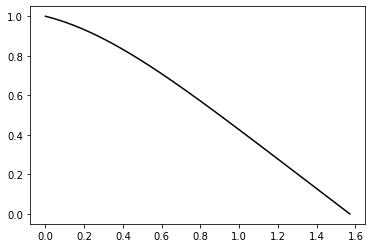

In [5]:
#  Solve the system and plot the results
a = Nonlinear()
plt.plot(a.x, a.y, 'k')